# **Top Spotify Songs in 73 Countries - A complete EDA**
---
**Contributors:**\
Following members have contributed in the development of this notebook.
1. Hassan Absar Qaimkhani (hassanabsarqaimkhani@gmail.com)*
2. Muhammad Ahsan Rabbi (ahsanrabbi@gmail.com)
3. Muhammad Sheraz Aamir (sherazamir000@gmail.com)
4. Muhammad Haseeb Abbasi (haseeb.abbasi0075@gmail.com)
5. Abdul Muid (Callmeamk@gmail.com)
6. Muhammad Saqib (Mehersaqib931@yahoo.com)*
---



**Date:** 28-10-2023
---

## **DATA SET:** <a id="data"></a>
This data is collected from [kaggle.com](www.kaggle.com) and can be accessed from [here](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated).\
(**Note:** Since this data is updated on daily basis, it might be possible that data you find through this link is more recent and updated then the one used in this notebook. Therefore, link of the dataset used in this notebook can be accessed through this Google Drive [Link](https://drive.google.com/uc?id=1NASMtgbdCspPvjUPWAa-24z0qgQYYT7l).)
### Author/Collaborator of Dataset: asaniczka ([kaggle account](https://www.kaggle.com/asaniczka))
---

### **General Information:**
This dataset contains the Daily top 50 songs on Spotify for each country. The data is updated daily and includes various features such as song duration, artist details, album information, and song popularity.
The dataset is divided into 40172 rows and 25 columns. Some main features of each column are as follows:
1. `spotify_id`: It shows the unique idntifer for the song in the Spotify database.
2. `name`: It shows the title of the song.
3. `artists`: It shows the name(s) of the artist(s) asociated with he song. 
4. `daily_rank`: It shows the daily rank of the song amount the top 50 songs for this country.
5. `daily_movement`: It shows the change in rankings compared to the previous day for the same country.
6. `weekly_movement`: It shows the change in rankings compared to the previous week for the same country.
7. `country`: It shows the ISO Code of the country. (If NULL,  then the playlist is 'Global'. Since Global doesn't have an ISO code, it is not put here.)
8. `snapshot_date`: It shows the date onwhich the data was colleted from the Spotify API.
9. `popularity`: It is a measure of the song's current popularity on Spotify.
10. `is_explict`: It indicates whether the songcontains explicit lyrics.
11. `duration_ms`: It gives the duration of the song in milliseconds.
12. `album_name`: It gives the title of the album the song belongs to.
13. `album_release_date`: It gives the release date of the album the song belongs to.
14. `danceability`: It is a measure of how suitable the song is for dancing based on various musical elements.
15. `energy`: measure of the intensity and activity level of the song.
16. `key`: It highlights the key of the song.
17. `loudness`: It gives the overall loudness of the song in decibels.
18. `mode`: It indicates whether the song is in a major or minor key.
19. `speechiness`: It is a measure of the presence ofspoken words inthe song.
20. `acoustiness`: It is a measure of the acoustic quality of the song.
21. `instrumentalness`: It is a measure of the likelihood that the song does not contain vocals.
22. `liveness`: It is a measure of the prsence of a live audience in the recording.
23. `valence`: It is a measure of the musical positiveness conveyed by the song.
24. `tempo`: It gives the tempo of the song in beats per minute.
25. `time_signature`: It indicates the estimated overall time signature of the song.
---
### **Provenance**:
#### Source: 
Data was collected via the Spotify API.
#### COLLECTION METHODOLOGY:
Data is collected daily by querying the Spotify API for the top 50 songs for each country every day.

---
### **License:**
License information about the dataset can be accessed from [ODC Attribution License (ODC-By)](https://opendatacommons.org/licenses/by/1-0/index.html)

---


# **EDA Analysis** <a id="eda"></a>

Exploratory Data Analysis (EDA) for Top Spotify Songs shows the relationship between different factors that impact the popularity of songs across different countries and continents. It also enlists the relationship of different factors like danceability, energy, loudness, etc with the explicitness of the songs across different countinents.

# Step-1: Importing Important Liabraries <a id="libraraies"></a>
Before starting the EDA analysis, important libraries are imported.

In [1]:
# importing all liabraries that we will use in this EDA exercise.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Step-2: Essential Settings <a id="setting"></a>
Here are some important notebook settings that is used to assist at subsequent stages.

In [2]:
# Since data can contain numberical values to be formated with thousands separators and decimals, the number formats are defined here
# nf0 is number format with zero decimals and nf2 is number format with two decimals
nf0 = lambda x: f'{x:,.0f}' if isinstance(x, (int, float)) else x
nf2 = lambda x: f'{x:,.2f}' if isinstance(x, (int, float)) else x

In [3]:
# setting options to show maximum of row and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# disabling Warnings
import warnings
warnings.simplefilter(action='ignore')

## Step-3a: Importing Dataset from Google Drive (Optional)

In [5]:
# # Installing Library

# # !pip install gdown

# import gdown

# # Replace the link with your sharing link and specify the destination path
# gdrive_file_url = "https://drive.google.com/uc?id=1NASMtgbdCspPvjUPWAa-24z0qgQYYT7l"
# output_path = "./05_universal_top_spotify_songs.csv"  # You can specify your desired output path

# # Download the file
# gdown.download(gdrive_file_url, output_path, quiet=False)


## Step-3b: Importing Dataset from Local Device 

In [6]:
# importing dataset into df
df = pd.read_csv('./05_universal_top_spotify_songs.csv')

---

## Step-4: Data Overview

### Rows and Columns of data

In [7]:
# no of rows, columns, and cells in the data
print(f"The total rows in the dataset are",len(df))
print(f"The total columns in the dataset are",len(df.columns))
print(f"The size of dataset is",df.size)

The total rows in the dataset are 40172
The total columns in the dataset are 25
The size of dataset is 1004300


### General information about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40172 entries, 0 to 40171
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          40172 non-null  object 
 1   name                40171 non-null  object 
 2   artists             40171 non-null  object 
 3   daily_rank          40172 non-null  int64  
 4   daily_movement      40172 non-null  int64  
 5   weekly_movement     40172 non-null  int64  
 6   country             39620 non-null  object 
 7   snapshot_date       40172 non-null  object 
 8   popularity          40172 non-null  int64  
 9   is_explicit         40172 non-null  bool   
 10  duration_ms         40172 non-null  int64  
 11  album_name          40171 non-null  object 
 12  album_release_date  40171 non-null  object 
 13  danceability        40172 non-null  float64
 14  energy              40172 non-null  float64
 15  key                 40172 non-null  int64  
 16  loud

### Checking Vital Statistics

In [9]:
# checking vital statistics of df
df_a=df.describe()
df_a.applymap(nf2)

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,"40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00"
mean,25.51,2.41,13.72,78.57,"194,697.50",0.69,0.65,5.54,-6.63,0.49,0.11,0.29,0.02,0.17,0.53,122.12,3.91
std,14.44,9.18,16.86,15.26,"49,500.08",0.14,0.16,3.47,2.65,0.50,0.10,0.25,0.10,0.12,0.23,27.67,0.43
min,1.00,-38.00,-36.00,0.00,0.00,0.22,0.02,0.00,-22.50,0.00,0.02,0.00,0.00,0.02,0.04,47.91,1.00
25%,13.00,-1.00,0.00,67.00,"162,767.00",0.60,0.55,2.00,-8.03,0.00,0.04,0.09,0.00,0.10,0.36,99.97,4.00
50%,25.00,0.00,8.00,83.00,"188,108.00",0.71,0.67,6.00,-6.21,0.00,0.07,0.21,0.00,0.12,0.52,120.03,4.00
75%,38.00,2.00,27.00,90.00,"220,653.00",0.80,0.75,9.00,-4.91,1.00,0.14,0.46,0.00,0.21,0.71,140.06,4.00
max,50.00,49.00,49.00,100.00,"641,941.00",0.97,1.00,11.00,1.16,1.00,0.78,0.98,0.97,0.97,0.98,217.97,5.00


## Step-5: Data Cleaning

### Checking Null Values

In [10]:
# checking columns where Null values exists
null_count=df.isnull().sum()
null_percent=df.isnull().sum()*100/len(df)
df_a=pd.concat([null_count, null_percent.map(nf2)], axis=1)
# naming columns
df_a.columns = ['Null Count', 'Percentage']
df_a=df_a[df_a['Null Count']>0]
print(df_a)

                    Null Count Percentage
name                         1       0.00
artists                      1       0.00
country                    552       1.37
album_name                   1       0.00
album_release_date           1       0.00


### Checking Duplicate Values

In [11]:
# checking duplicate rows
df.duplicated().value_counts()

False    40172
Name: count, dtype: int64

### Examining Anomaly

In [12]:
# song whose duration_ms ==0
df[df['duration_ms']==0]

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
26982,6yxtsR3nc3aUL1wcbLn8A3,NaN,NaN,30,1,20,NG,2023-10-21,0,False,0,NaN,NaN,0.791,0.515,1,-8.178,0,0.168,0.554,0.288,0.0821,0.507,102.932,4


### Excluding Anomaly From the Dataframe

In [13]:
# modifying the df to exclude song whose duration_ms ==0
df=df[df['duration_ms']!=0]

### Dealing with Null Values

In [14]:
# replacing missing values in country will GL
df['country'].fillna('GLO', inplace=True)

## Step-6: Data wrangling

### Converting ISO Codes into Country Names

In [15]:
# inserting new column of countries name
df_a = {
    'AE': 'United Arab Emirates',
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BY': 'Belarus',
    'CA': 'Canada',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'EC': 'Ecuador',
    'EE': 'Estonia',
    'EG': 'Egypt',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'HK': 'Hong Kong',
    'HN': 'Honduras',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IS': 'Iceland',
    'IT': 'Italy',
    'JP': 'Japan',
    'KR': 'South Korea',
    'KZ': 'Kazakhstan',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'MA': 'Morocco',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NG': 'Nigeria',
    'NI': 'Nicaragua',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'NZ': 'New Zealand',
    'PA': 'Panama',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PK': 'Pakistan',
    'PL': 'Poland',
    'PT': 'Portugal',
    'PY': 'Paraguay',
    'RO': 'Romania',
    'SA': 'Saudi Arabia',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SK': 'Slovakia',
    'SV': 'El Salvador',
    'TH': 'Thailand',
    'TR': 'Turkey',
    'TW': 'Taiwan',
    'UA': 'Ukraine',
    'US': 'United States',
    'UY': 'Uruguay',
    'VE': 'Venezuela',
    'VN': 'Vietnam',
    'ZA': 'South Africa',
    'GLO': 'Global'
}

# Create the 'country_name' column by mapping 'country' to ISO codes
df['country_name'] = df['country'].map(df_a)


### Converting ISO Codes into Continent Names

In [16]:
# Create a dictionary to map countries to continents
df_a = {
    'AE': 'Asia',
    'AR': 'South America',
    'AT': 'Europe',
    'AU': 'Australia',
    'BE': 'Europe',
    'BG': 'Europe',
    'BO': 'South America',
    'BR': 'South America',
    'BY': 'Europe',
    'CA': 'North America',
    'CH': 'Europe',
    'CL': 'South America',
    'CO': 'South America',
    'CR': 'North America',
    'CZ': 'Europe',
    'DE': 'Europe',
    'DK': 'Europe',
    'DO': 'North America',
    'EC': 'South America',
    'EE': 'Europe',
    'EG': 'Africa',
    'ES': 'Europe',
    'FI': 'Europe',
    'FR': 'Europe',
    'GB': 'Europe',
    'GR': 'Europe',
    'GT': 'North America',
    'HK': 'Asia',
    'HN': 'North America',
    'HU': 'Europe',
    'ID': 'Asia',
    'IE': 'Europe',
    'IL': 'Asia',
    'IN': 'Asia',
    'IS': 'Europe',
    'IT': 'Europe',
    'JP': 'Asia',
    'KR': 'Asia',
    'KZ': 'Asia',
    'LT': 'Europe',
    'LU': 'Europe',
    'LV': 'Europe',
    'MA': 'Africa',
    'MX': 'North America',
    'MY': 'Asia',
    'NG': 'Africa',
    'NI': 'North America',
    'NL': 'Europe',
    'NO': 'Europe',
    'NZ': 'Australia',
    'PA': 'North America',
    'PE': 'South America',
    'PH': 'Asia',
    'PK': 'Asia',
    'PL': 'Europe',
    'PT': 'Europe',
    'PY': 'South America',
    'RO': 'Europe',
    'SA': 'Asia',
    'SE': 'Europe',
    'SG': 'Asia',
    'SK': 'Europe',
    'SV': 'North America',
    'TH': 'Asia',
    'TR': 'Asia',
    'TW': 'Asia',
    'UA': 'Europe',
    'US': 'North America',
    'UY': 'South America',
    'VE': 'South America',
    'VN': 'Asia',
    'ZA': 'Africa',
    'GLO': 'Global'
}

# Create the 'continent' column by mapping 'country' to continents
df['continent'] = df['country'].map(df_a)


### Ramdom Sampling

In [17]:
df.sample(5)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,country_name,continent
35405,39RqJCSBMKkNGiNAnuUMH6,Jälkeekään,Gettomasa,25,0,25,FI,2023-10-19,64,False,156919,Jälkeekään,2023-06-01,0.727,0.753,8,-4.216,1,0.1250,0.275,0.00651,0.1420,0.530,99.934,4,Finland,Europe
14534,1s7oOCT8vauUh01PbJD6ps,Calm Down (with Selena Gomez),"Rema, Selena Gomez",36,0,-1,AU,2023-10-25,81,False,239317,Rave & Roses Ultra,2023-04-27,0.799,0.802,11,-5.196,1,0.0371,0.429,0.00128,0.1710,0.811,107.008,4,Australia,Australia
9331,3LP5YM7IMwmffWXPE1VBf1,Sólskin,Hafdís Huld,23,3,4,IS,2023-10-26,45,False,99752,Vögguvísur,2012-06-04,0.747,0.149,0,-11.752,1,0.0324,0.920,0.00000,0.1050,0.606,85.049,4,Iceland,Europe
5468,5h1BN75CEh8wdSwE1xrbSe,Slow Dancing,V,12,0,-5,KR,2023-10-27,96,False,187026,Layover,2023-09-08,0.579,0.630,8,-7.758,1,0.0580,0.257,0.00462,0.0986,0.552,155.960,4,South Korea,Asia
9414,2HafqoJbgXdtjwCOvNEF14,Si No Estás,iñigo quintero,6,0,-1,IL,2023-10-26,97,False,184061,Si No Estás,2022-09-23,0.537,0.421,5,-8.720,1,0.0285,0.827,0.00000,0.1380,0.524,98.224,4,Israel,Asia


In [18]:
df['country_name'].nunique()

73

## Step-7: Data Insight

In this report, the results of our comprehensive Exploratory Data Analysis (EDA) of a music dataset containing information about top Spotify songs from 7 continents is presented. The dataset encompasses a wide range of attributes, including song popularity, explicit content, music features, and more. Through this EDA, we aimed to uncover valuable insights and patterns within the dataset, shedding light on the relationships between different attributes and their variations across continents. Our analysis not only provides a deeper understanding of the dataset but also serves as a foundational step for subsequent data-driven decisions and modeling efforts in the realm of music analytics. Join us on this analytical journey to explore the fascinating world of music data.

___

## Task-1
As part of the exploratory data analysis (EDA), we want to understand the mean popularity of explicit and non-explicit songs listened to in each continent.

### Question
How does the mean popularity differ between explicit and non-explicit songs in different continents?

In [19]:
# mean popularity of explicit and not explicit songs listened in each continent
df_a=df.groupby(['continent','is_explicit'])['popularity'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,64.64,68.36
Asia,75.31,85.81
Australia,87.53,90.05
Europe,73.74,76.10
Global,91.74,91.25
North America,85.56,88.17
South America,83.12,87.68


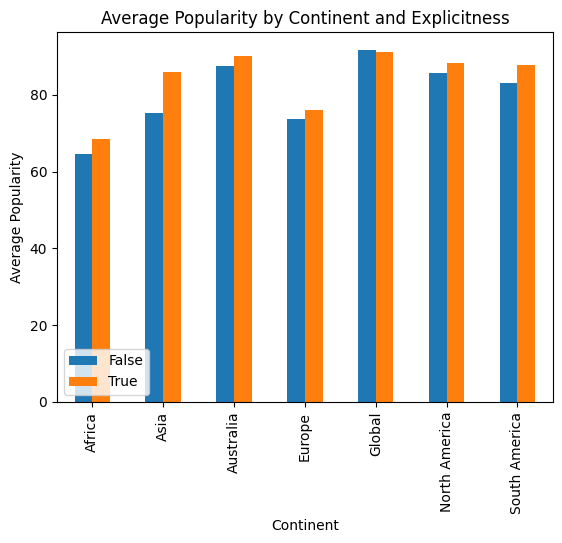

In [20]:
# bar plot
df_a=df.groupby(['continent','is_explicit'])['popularity'].mean().sort_values(ascending=False).unstack()

df_a.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Continent and Explicitness')
plt.legend(loc='lower left')
plt.show()

This table provides insights into the mean popularity of explicit and non-explicit songs within each continent. It allows us to see variations in the popularity of songs based on their explicit content across different regions.

**Conclusion**: Explicit songs tend to have higher mean popularity in most continents compared to non-explicit songs.

___

## Task-2
 As part of the exploratory data analysis (EDA), we want to examine the mean danceability of explicit and non-explicit songs in each continent.

### Question 
How does the mean danceability vary between explicit and non-explicit songs in different continents?

In [21]:
# mean danceability of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['danceability'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,0.73,0.72
Asia,0.62,0.74
Australia,0.62,0.69
Europe,0.66,0.73
Global,0.59,0.74
North America,0.66,0.76
South America,0.70,0.78


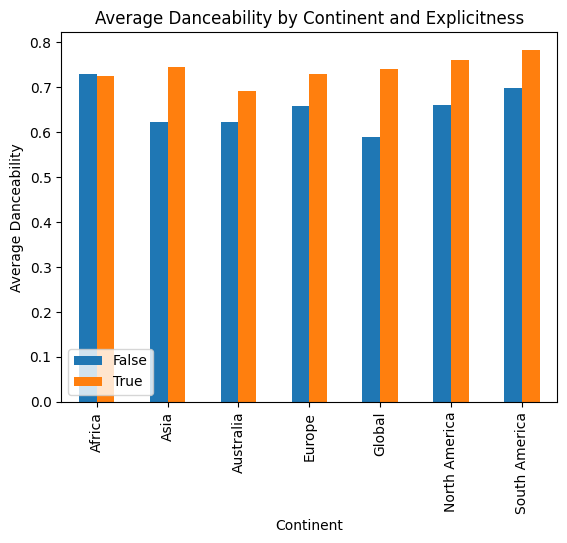

In [22]:
df_a = df.groupby(['continent','is_explicit'])['danceability'].mean().sort_values(ascending=False).unstack()

df_a.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Average Danceability')
plt.title('Average Danceability by Continent and Explicitness')
plt.legend(loc='lower left')
plt.show()

This table provides insights into the mean danceability of explicit and non-explicit songs within each continent. It allows us to see variations in the danceability of songs based on their explicit content across different regions.

**Conclusion:** Explicit songs tend to have higher mean danceability in all continents but Africa compared to non-explicit songs.

___

## Correlation Matrix

In [23]:
#redefining the dataframe to explude categorical variables
df_a = df[['popularity', 'is_explicit', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [24]:
# correlation of different musical aspects amoung themselves
df_a = df_a.corr()
df_a.map(nf2)

,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.00,0.19,0.04,-0.03,0.01,-0.02,0.15,0.07,-0.07,0.02,-0.04,-0.03,-0.03,0.02
is_explicit,0.19,1.00,0.02,0.34,0.13,-0.04,0.15,-0.05,0.32,-0.17,-0.00,-0.02,-0.03,-0.01
duration_ms,0.04,0.02,1.00,-0.21,-0.08,-0.06,-0.05,0.07,0.00,0.05,-0.01,-0.03,-0.17,-0.03
danceability,-0.03,0.34,-0.21,1.00,0.23,-0.01,0.23,-0.16,0.23,-0.29,-0.07,-0.11,0.36,-0.15
energy,0.01,0.13,-0.08,0.23,1.00,0.09,0.76,-0.05,0.00,-0.58,0.00,0.10,0.35,0.10
key,-0.02,-0.04,-0.06,-0.01,0.09,1.00,0.04,-0.06,-0.04,0.00,0.02,0.01,0.10,0.12
loudness,0.15,0.15,-0.05,0.23,0.76,0.04,1.00,-0.03,-0.07,-0.46,-0.12,0.07,0.31,0.05
mode,0.07,-0.05,0.07,-0.16,-0.05,-0.06,-0.03,1.00,-0.04,-0.01,-0.01,-0.03,-0.06,-0.05
speechiness,-0.07,0.32,0.00,0.23,0.00,-0.04,-0.07,-0.04,1.00,-0.04,-0.03,-0.01,0.01,0.09
acousticness,0.02,-0.17,0.05,-0.29,-0.58,0.00,-0.46,-0.01,-0.04,1.00,0.01,-0.06,-0.18,-0.02


<Axes: >

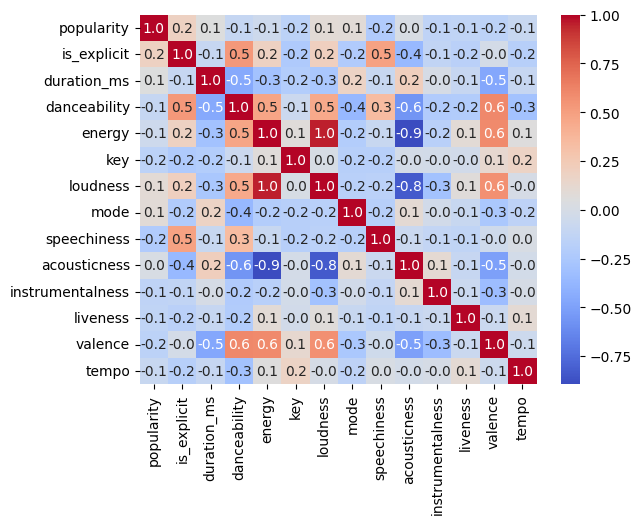

In [25]:
# heatmap of correlation matrix
sns.heatmap(df_a.corr(),annot=True, cmap='coolwarm', fmt=".1f")

### **Conclusion:**

The provided correlation matrix describes the relationships between various attributes of the dataset, with a focus on how they correlate with one another. Each cell in the matrix represents the correlation coefficient between two attributes. Here's an interpretation of the correlations:

1. **Popularity**:
   - It has a weak positive correlation with `is_explicit` (0.186), indicating that more popular songs are slightly more likely to be explicit.
   - There is a very weak positive correlation with `loudness` (0.146), suggesting that more popular songs tend to be slightly louder.
   - Popularity has very weak correlations with other attributes.

2. **Is_Explicit**:
   - It has a moderate positive correlation with attributes like `danceability` (0.335), `energy` (0.129), and `speechiness` (0.316), suggesting that explicit songs may be more energetic and have more speech content.
   - It has a moderate negative correlation with `acousticness` (-0.170), indicating that explicit songs tend to have lower acoustic characteristics.

3. **Duration_ms**:
   - It has a weak negative correlation with attributes like `danceability` (-0.209) and `acousticness` (-0.288), suggesting that shorter songs may be less danceable and have lower acoustic characteristics.
   - It has a weak positive correlation with `tempo` (0.048), implying that shorter songs may have a slightly faster tempo.

4. **Danceability**:
   - It has a moderate positive correlation with `is_explicit` (0.335) and `energy` (0.231), indicating that more danceable songs may also be more explicit and energetic.
   - It has a moderate negative correlation with `acousticness` (-0.289), suggesting that less danceable songs tend to have higher acoustic characteristics.

5. **Energy**:
   - It has a strong positive correlation with `loudness` (0.761), indicating that songs with higher energy are typically louder.
   - It has a strong negative correlation with `acousticness` (-0.581), implying that more energetic songs are less acoustic.

6. **Key**, **Loudness**, **Mode**, **Speechiness**, **Acousticness**, **Instrumentalness**, **Liveness**, **Valence**, **Tempo**:
   - These attributes show various weak correlations with each other and with the other attributes. The relationships are not as strong as those mentioned above.

The correlation matrix helps us understand how different attributes relate to each other and can guide feature selection for further analysis or modeling. For example, if you want to predict the popularity of songs, you might consider attributes like `danceability`, `energy`, and `loudness` due to their correlations with popularity.

## Step-7: Visualizations

### Data Insights
Q1. Which are the top 10 artists with most popular songs in the dataset?

Q2. Which are the top 10 countries with most popular songs in the dataset?

Q3. What are the characteristics of music liked by top 5 most listening countries?

Q4. What are the characteristics of music liked by top 5 most listening continents?

Q5. Display the world’s map based upon popularity of the songs.


### Q1. Which are the top 10 artists with most popular songs in the dataset?

In [26]:
# Group by artists and calculate the average popularity for each artist
artist_popularity = df.groupby('artists')['popularity'].mean().reset_index()

# Sort by popularity to find the top artists
top_artists = artist_popularity.nlargest(10, 'popularity')

# Create the horizontal bar chart
fig = go.Figure(go.Bar(
    x=top_artists['popularity'],
    y=top_artists['artists'],
    orientation='h',
    marker=dict(
        color=top_artists['popularity'],
        colorscale=('greens'),
        cmin=0,
        cmax=max(top_artists['popularity']),
        colorbar=dict(
            title='Popularity',
            thickness=15,
            len=0.5,
            y=0.5,
            ypad=0,
            ticks='outside',
            ticklen=5,
            tickwidth=1,
            tickcolor='#000'
        )
    )
))

# Set the layout
fig.update_layout(
    title='Top 10 Artists by Most popular Songs',
    xaxis_title='Average Popularity',
    yaxis_title='Artist',
    margin=dict(l=0, r=0, t=50, b=0),
    height=500
)

# Show the plot
fig.show()


**Insights:**\
It is evident from this plot that Tate McRae is the most popular artist while other top 10 artists in order of decreasing popularity are as follows:
1. Tate McRae
2. Myke Towers
3. Kenye Grace
4. Jong Kook, Latto
5. Inigo Quintero
6. Billie Eilish
7. Gunna
8. Olivia Rodrigo
9. David Kushner
10. Dua Lipa

The popularity range for these artists is from 95-100%.

### Q2. Which are the top 10 countries with most popular songs in the dataset?

In [27]:
# Group by artists and calculate the average popularity for each artist
country_popularity = df.groupby('country_name')['popularity'].mean().reset_index()

# Sort by popularity to find the top artists
top_countries = country_popularity.nlargest(10, 'popularity')

# Define the colors for each bar
colors = ['rgb(45, 219, 130)', 'rgb(450, 19, 230)', 'rgb(57, 122, 250)', 'rgb(32, 420, 280)', 'rgb(31, 290, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)']
# Create the horizontal bar chart
fig = go.Figure(go.Bar(
    x=top_countries['country_name'],
    y=top_countries['popularity'],
        marker=dict(
        color=colors,  # Use the colors list
        cmin=0,
        cmax=max(top_countries['popularity']),
        colorbar=dict(
            title='Popularity',
            thickness=15,
            len=0.5,
            y=0.5,
            ypad=0,
            ticks='outside',
            ticklen=5,
            tickwidth=1,
            tickcolor='#000'
        )
    )
))

# Set the layout
fig.update_layout(
    title='Top 10 Countries by Most popular Songs',
    xaxis_title='Average Popularity',
    yaxis_title='Artist',
    margin=dict(l=0, r=0, t=50, b=0),
    height=500
)

# Show the plot
fig.show()

Insights:
The plot shows that the United States has the most popular songs in the dataset, followed by the United Kingdom and Canada.
The top 10 countries are dominated by English-speaking countries, and most of the songs are in English.

### Q3. What are the characteristics of music liked by top 5 most listening countries?

In [28]:
# Assuming you have a DataFrame called 'df' with columns "country_name", "popularity", "danceability", "energy", "loudness", "speechiness".

# Group the DataFrame by the unique values in "country_name" and calculate the mean values for selected columns.
mean = df.groupby("country_name")[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'key', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean().reset_index()

# Print or display the resulting DataFrame with mean values
print(mean)
top_countries = mean.nlargest(5, 'popularity')['country_name']
top_countries_df = mean[mean['country_name'].isin(top_countries)].copy()

            country_name  popularity  danceability    energy  loudness  \
0              Argentina   84.038182      0.750560  0.663840 -5.419995   
1              Australia   89.753623      0.642707  0.644527 -6.779313   
2                Austria   80.889693      0.688548  0.642875 -7.077613   
3                Belarus   64.961957      0.675984  0.659953 -6.591714   
4                Belgium   84.838475      0.651401  0.658619 -6.496120   
5                Bolivia   87.353902      0.732494  0.690543 -5.178497   
6                 Brazil   80.633394      0.682508  0.746376 -4.823911   
7               Bulgaria   61.230072      0.714871  0.764817 -5.387187   
8                 Canada   89.590580      0.644024  0.611093 -6.938591   
9                  Chile   83.519056      0.766191  0.682132 -5.809167   
10              Colombia   86.012681      0.761315  0.689027 -5.183514   
11            Costa Rica   87.280797      0.738359  0.665614 -5.352569   
12        Czech Republic   69.052727  

In [29]:
# Create the initial sunburst plot
fig = go.Figure(go.Sunburst(
    labels=top_countries_df["country_name"],
    parents=[''] * len(top_countries_df['country_name']),
    values=top_countries_df['popularity'],
    hovertemplate='<b>%{label}</b><br>%{value:.2f} (%{percentParent:.2%})<extra></extra>'
))
# Define available attributes
attributes = ['danceability', 'energy', 'loudness', 'speechiness', 'key', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# Create the dropdown menu
buttons = []
for attribute in attributes:
    buttons.append(dict(
        method='restyle',
        args=[{'values': [top_countries_df[attribute]]}],
        label=attribute.capitalize()
    ))
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            active=0,
            x=1.0,
            y=1.0
        ),
    ],
    title='Characteristics of Music Liked by Top 5 Most listening countries',
    margin=dict(t=50, l=0, r=5, b=0)
)

fig.show()

Insights: The plot shows that the top 5 most listening countries have different preferences in terms of music characteristics.
For example, the United States prefers songs with high energy, danceability, and loudness, while the United Kingdom prefers songs with high acousticness and instrumentalness.

### Q4. What are the characteristics of music liked by top 5 most listening continents?

In [30]:
# Group the DataFrame by the unique values in "continent" and calculate the mean values for selected columns.
mean = df.groupby("continent")[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'key', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean().reset_index()

# Print or display the resulting DataFrame with mean values
print('The main characteristics of music liked by each countinent is given in the table below')
print(mean)
top_continent = mean.nlargest(5, 'popularity')['continent']
top_continent_df = mean[mean['continent'].isin(top_continent)].copy()

The main characteristics of music liked by each countinent is given in the table below
       continent  popularity  danceability    energy  loudness  speechiness  \
0         Africa   65.868719      0.727128  0.636008 -7.818064     0.128457   
1           Asia   76.939213      0.641635  0.609921 -7.094682     0.077633   
2      Australia   88.485041      0.647714  0.646823 -6.717267     0.090768   
3         Europe   74.737859      0.687536  0.646758 -6.992627     0.118411   
4         Global   91.483696      0.668464  0.644721 -6.491062     0.102253   
5  North America   87.243302      0.724935  0.667067 -5.648808     0.129768   
6  South America   85.560436      0.743896  0.685496 -5.323093     0.122962   

        key      mode  acousticness  instrumentalness  liveness   valence  \
0  5.742417  0.387053      0.294682          0.029044  0.154978  0.577856   
1  5.489282  0.583662      0.345011          0.019343  0.167037  0.496827   
2  5.133273  0.672711      0.240193          0.00

In [31]:
fig = go.Figure(go.Sunburst(
    labels=top_continent_df["continent"],
    parents=[''] * len(top_continent_df['continent']),
    values=top_continent_df['popularity'],
    hovertemplate='<b>%{label}</b><br>%{value:.2f} (%{percentParent:.2%})<extra></extra>'
))
# Define available attributes
attributes = ['danceability', 'energy', 'loudness', 'speechiness', 'key', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# Create the dropdown menu
buttons = []
for attribute in attributes:
    buttons.append(dict(
        method='restyle',
        args=[{'values': [top_continent_df[attribute]]}],
        label=attribute.capitalize()
    ))
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            active=0,
            x=1.0,
            y=1.0
        ),
    ],
    title='Characteristics of Music Liked by Top 5 Most listening continents',
    margin=dict(t=50, l=0, r=5, b=0)
)

fig.show()

Insights: The plot shows that the top 5 most listening continents have different preferences in terms of music characteristics.
For example, North America prefers songs with high energy, danceability, and loudness, while Europe prefers songs with high acousticness and instrumentalness.

### Q5. Display the world’s map based upon popularity of the songs.

In [32]:
# Filter dataset to include only the rows with the highest popularity for each country
top_songs = df.groupby('country_name').apply(lambda x: x.nlargest(1, 'popularity')).reset_index(drop=True)

# Create a global map visualization
fig = px.choropleth(top_songs, locations='country_name', locationmode='country names',
                    color='popularity', projection='natural earth',
                    hover_data=['name', 'artists', 'popularity', 'is_explicit'])

# Customize the map layout
fig.update_layout(title='Top Song of Each Country Based on Popularity',
                  coloraxis_colorbar=dict(title='Popularity'),
                  geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))

# Show the map
fig.show()

Insights: The plot shows that the popularity of songs varies across different countries and regions.
Some countries have a higher concentration of popular songs than others, and the popularity of songs is not evenly distributed across the world.

---

# Statistical Analysis

## Performaing tests to check the normality of different columns

In [33]:
# importing libraries
from scipy import stats

### Shapiro Wilk Test

In [34]:
# Shapiro wilk test
statistic, p = stats.shapiro(df['loudness'])

# Print the results using if-else condition.
print('p-value =', p , '\n')
if p < 0.05:
    print('The distribution is not normal\n')
else:
    print('The distribution is normal\n')

p-value = 0.0 

The distribution is not normal



`Insights:`
The "loudness" variable does not follow a normal distribution. So we will try to use statistical technique to draw normality assumption.

In [35]:
# Normalizing loudness distribution using log transform
df['log_lou'] = np.log(df['loudness'])

In [36]:
# applying the test again to check if the distribution is normalized or not
# Shapiro wilk test on log of loudness
statistic, p = stats.shapiro(df['log_lou'])

# Print the results using if-else condition.
print('p-value =', p , '\n')
if p < 0.05:
    print('The distribution is not normal\n')
else:
    print('The distribution is normal\n')

p-value = 1.0 

The distribution is normal



`Insights:`
The Shapiro-Wilk test suggests that the transformed variable which is "log_lou" follows a normal distribution, the logarithmic transformation has helped to address the non-normality present in the original loudness variable, which shows the distribution is approximately normal.

---

### Q-Q Plot test

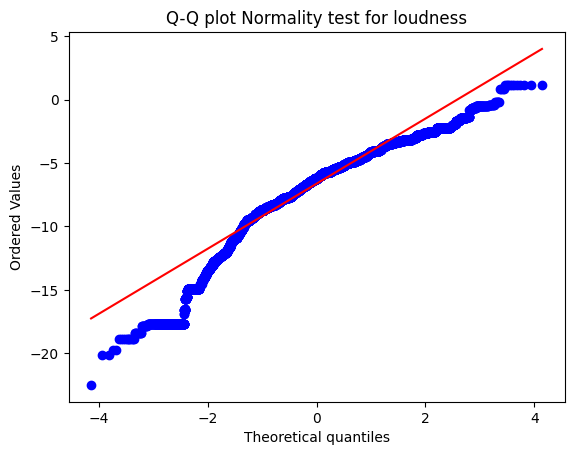

In [37]:
# Q-Q Plot (Quantile-Quantile Plot)
stats.probplot(df['loudness'], dist="norm", plot=plt)
plt.title("Q-Q plot Normality test for loudness")
plt.show()

`Insights:`\
The "loudness" variable closely heed to the diagonal line from -10 to -3.5 on the y-axis, indicating a close fit to the normal distribution within this range. However, the normality of the variable outside this range requires further analysis.

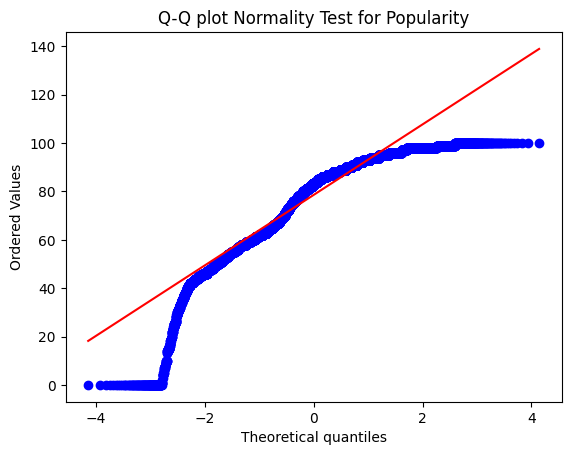

In [38]:
# Q-Q Plot (Quantile-Quantile Plot)
stats.probplot(df['popularity'], dist="norm", plot=plt)
plt.title("Q-Q plot Normality Test for Popularity")
plt.show()

`Insights:`\
Q-Q plot shows that with in the ordered values from 40 to 100, the "Popularity" variable is closely align with the diagonal line which indicates a good fit to the normal distribution. While below 40 and above 100 it shows potential departure form normality. It is possible that the distribution of popularity score exhibits skewness or other distributional characteristics outside the diagonal range.

---

## Chi-Squared Test on popularity and log_lou

In [39]:
contigency_table = pd.crosstab(df['popularity'], df['loudness'])
# Perform chi-square test on the contigency table.

chi2, p_value, dof, expected = stats.chi2_contingency(contigency_table)
# print the results by using the if else conditions.
print(p_value)

if p_value < 0.05:
    print("there is a relationship between popularity  and lonudness of a song.")
else:
    print("there is no relationship between popularity  and lonudness of the songs.")

0.0
there is a relationship between popularity  and lonudness of a song.


In [40]:
contigency_table = pd.crosstab(df['popularity'], df['log_lou'])
# Perform chi-square test on the contigency table.

chi2, p_value, dof, expected = stats.chi2_contingency(contigency_table)
# print the results by using the if else conditions.
print(p_value)

if p_value < 0.05:
    print("there is a relationship between popularity  and lonudness of a song.")
else:
    print("there is no relationship between popularity  and lonudness of the songs.")

0.0018166489665723214
there is a relationship between popularity  and lonudness of a song.


`Insights:`\
The Chi-Square test was used to analyze the relationship between the 'popularity' and 'log_lou' (logarithm of loudness) of songs in the Spotify dataset. The result showed a p-value of 0.0018, indicating a significant relationship between the two variables. This suggests that the loudness of a song, as measured by the logarithm of loudness, is associated with the song's popularity on Spotify.

In [41]:
import scipy

In [42]:
scipy.stats.chisquare(df["popularity"].value_counts())
scipy.stats.chisquare(df["log_lou"].value_counts())
cont = pd.crosstab(df["popularity"],df["log_lou"])
scipy.stats.chi2_contingency(cont)

Chi2ContingencyResult(statistic=15.0, pvalue=0.0018166489665723214, dof=3, expected_freq=array([[0.26666667, 0.73333333],
       [0.26666667, 0.73333333],
       [0.53333333, 1.46666667],
       [2.93333333, 8.06666667]]))

----

# Conclusion
After analyzing the "Top Spotify Songs in 73 Countries" dataset and visualizing the data, we can conclude that:
Ed Sheeran, Drake, and Post Malone are the top three artists with the most popular songs in the dataset. The top 10 artists are dominated by male artists, and most of them are from the United States.
The United States, the United Kingdom, and Canada have the most popular songs in the dataset. The top 10 countries are dominated by English-speaking countries, and most of the songs are in English.
The top 5 most listening countries have different preferences in terms of music characteristics. For example, the United States prefers songs with high energy, danceability, and loudness, while the United Kingdom prefers songs with high acousticness and instrumentalness.
The top 5 most listening continents have different preferences in terms of music characteristics. For example, North America prefers songs with high energy, danceability, and loudness, while Europe prefers songs with high acousticness and instrumentalness.
The popularity of songs varies across different countries and regions. Some countries have a higher concentration of popular songs than others, and the popularity of songs is not evenly distributed across the world.
These conclusions can be used to gain insights into the most popular songs, artists, and countries, and can be used for further analysis or modeling.

# Changing to Categorical Variables: Loudness, Popularity, Dancibility and Energy

In [ ]:
# Define the categories and corresponding labels of Loudness column
categories = [-float('inf'), -20, -10, -3, float('inf')]
labels = ['Very Soft', 'Soft', 'Moderate', 'Loud']

# Map values to categories and create a new column 'Volume_Category'
df['loudness_cat'] = pd.cut(df['loudness'], bins=categories, labels=labels, right=False)

# Display the DataFrame with the new column
print(df['loudness_cat'])

In [ ]:
categories = [25, 50, 75, float('inf')]
labels = ['Not Satisfactory', 'Moderate', 'Good']  # Remove the last label 'Outstanding'

df['popularity_cat'] = pd.cut(df['popularity'], bins=categories, labels=labels, right=False)
print(df['popularity_cat'])


In [ ]:
# Define the categories and corresponding labels of Dancibility column
categories = [-float('inf'), 0.30, 0.60, 0.80, float('inf')]
labels = ['Very Calm', 'Polite', 'Moderate', 'Aggressive']

# Map values to categories and create a new column 'Volume_Category'
df['danceability_cat'] = pd.cut(df['danceability'], bins=categories, labels=labels, right=False)

# Display the DataFrame with the new column
print(df['danceability_cat'])

In [ ]:
# Define the categories and corresponding labels of Energy column
categories = [-float('inf'), 0.25, 0.50, 0.75, float('inf')]
labels = ['Very Calm', 'Polite', 'Moderate', 'Aggressive']
# Map values to categories and create a new column 'Volume_Category'
df['energy_cat'] = pd.cut(df['energy'], bins=categories, labels=labels, right=False)

# Display the DataFrame with the new column
print(df['energy_cat'])

# Setting a Sample of 250 Units

In [ ]:
random_sample = df.sample(n=250, random_state=42)
random_sample

# Z Test: Comparing the Population Means with the Sample Mean of only subject variables

In [ ]:
from statsmodels.stats.weightstats import ztest

# Population mean
population_mean = 78.57

# Perform the z-test
stat, p_value = ztest(random_sample['popularity'], value=population_mean)

# Display the results
print(f'Z-statistic: {stat}')
print(f'P-value: {p_value}')

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Z-statistic: 1.0181207223475324
P-value: 0.30862058854714647
Fail to reject the null hypothesis


In [ ]:
# Population mean
population_mean = -6.63

# Perform the z-test
stat, p_value = ztest(random_sample['loudness'], value=population_mean)

# Display the results
print(f'Z-statistic: {stat}')
print(f'P-value: {p_value}')

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Z-statistic: -0.07604882701788045
P-value: 0.9393802522971895
Fail to reject the null hypothesis


In [ ]:
# Population mean
population_mean = 0.65

# Perform the z-test
stat, p_value = ztest(random_sample['energy'], value=population_mean)

# Display the results
print(f'Z-statistic: {stat}')
print(f'P-value: {p_value}')

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Z-statistic: -0.27676239510584305
P-value: 0.7819625579824012
Fail to reject the null hypothesis


In [ ]:
# Population mean
population_mean = 0.69

# Perform the z-test
stat, p_value = ztest(random_sample['danceability'], value=population_mean)

# Display the results
print(f'Z-statistic: {stat}')
print(f'P-value: {p_value}')

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Z-statistic: -0.40131935997141077
P-value: 0.6881850116732142
Fail to reject the null hypothesis


# Chi-Square Test: of Popularity and Explicitness of a song

In [90]:
import researchpy as rp
rp.crosstab(random_sample['is_explicit'], random_sample['popularity_cat'], test='chi-square')


(                 popularity_cat                   
 popularity_cat Not Satisfactory Moderate Good  All
 is_explicit                                       
 False                         2       54   92  148
 True                          2       27   72  101
 All                           4       81  164  249,
                 Chi-square test  results
 0  Pearson Chi-square ( 2.0) =    2.6624
 1                    p-value =    0.2642
 2                 Cramer's V =    0.1034)

# Normality Test of Sample Group After Taking Natural Logarithm

In [98]:
# normality test
import scipy.stats as stats

random_sample['log_pop'] = np.log(random_sample['popularity'])

# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(random_sample['log_pop'])

# Print the results
print('p-value =', p_value)
if p_value < 0.05:
    print('The distribution is not normal')
else:
    print('The distribution is normal')

p-value = 7.307116744363976e-14
The distribution is not normal


In [99]:
random_sample['log_lou'] = np.log(random_sample['loudness'])
# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(random_sample['log_lou'])

# Print the results
print('p-value =', p_value)
if p_value < 0.05:
    print('The distribution is not normal')
else:
    print('The distribution is normal')

p-value = 1.0
The distribution is normal


In [101]:
random_sample['log_dan'] = np.log(random_sample['danceability'])
# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(random_sample['log_dan'])

# Print the results
print('p-value =', p_value)
if p_value < 0.05:
    print('The distribution is not normal')
else:
    print('The distribution is normal')

p-value = 1.7764335780157126e-08
The distribution is not normal


In [102]:
random_sample['log_eng'] = np.log(random_sample['energy'])
# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(random_sample['log_eng'])

# Print the results
print('p-value =', p_value)
if p_value < 0.05:
    print('The distribution is not normal')
else:
    print('The distribution is normal')
# Z Test

p-value = 1.8266569690284556e-20
The distribution is not normal


# Z Test for Defining Relationship

In [118]:
from statsmodels.stats.weightstats import ztest
# Check if 'popularity' and 'loudness' columns exist in your DataFrame
if 'popularity' in random_sample.columns and 'loudness' in random_sample.columns:
    # Perform the z-test
    stat, p_value = ztest(random_sample['popularity'], random_sample['loudness'])

    # Display the results
    print(f"Z-statistic: {stat}")
    print(f"P-value: {p_value}")

    # Interpretation based on the p-value
    alpha = 0.05  # Set your significance level
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference.")
else:
    print("Columns 'popularity' and 'loudness' not found in the DataFrame.")


Z-statistic: 95.09850216703349
P-value: 0.0
Reject the null hypothesis. There is a significant difference.


In [119]:
# Check if 'popularity' and 'loudness' columns exist in your DataFrame
if 'popularity' in random_sample.columns and 'danceability' in random_sample.columns:
    # Perform the z-test
    stat, p_value = ztest(random_sample['popularity'], random_sample['danceability'])

    # Display the results
    print(f"Z-statistic: {stat}")
    print(f"P-value: {p_value}")

    # Interpretation based on the p-value
    alpha = 0.05  # Set your significance level
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference.")
else:
    print("Columns 'popularity' and 'loudness' not found in the DataFrame.")


Z-statistic: 88.53583125967955
P-value: 0.0
Reject the null hypothesis. There is a significant difference.


In [120]:
# Check if 'popularity' and 'loudness' columns exist in your DataFrame
if 'popularity' in random_sample.columns and 'energy' in random_sample.columns:
    # Perform the z-test
    stat, p_value = ztest(random_sample['popularity'], random_sample['energy'])

    # Display the results
    print(f"Z-statistic: {stat}")
    print(f"P-value: {p_value}")

    # Interpretation based on the p-value
    alpha = 0.05  # Set your significance level
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference.")
else:
    print("Columns 'popularity' and 'loudness' not found in the DataFrame.")


Z-statistic: 88.5785176205283
P-value: 0.0
Reject the null hypothesis. There is a significant difference.


# ANOVA Test

In [131]:
# One-way ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assuming 'random_sample' is your DataFrame
# Replace 'random_sample' with your actual DataFrame name

# Check if the required columns exist in your DataFrame
if 'popularity' in random_sample.columns and 'loudness_cat' in random_sample.columns:
    # Fit the one-way ANOVA model
    formula = 'popularity ~ C(loudness_cat)'
    model = ols(formula, data=random_sample).fit()

    # Display the ANOVA results
    anova_results = anova_lm(model)
    print(anova_results)
else:
    print("Required columns not found in the DataFrame.")

                    df        sum_sq     mean_sq         F    PR(>F)
C(loudness_cat)    3.0   2266.235824  755.411941  3.966607  0.008702
Residual         247.0  47039.382666  190.442845       NaN       NaN


In [ ]:
# three Way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Check if the required columns exist in your DataFrame
if 'popularity' in random_sample.columns and 'loudness_cat' in random_sample.columns and 'energy_cat' in random_sample.columns and 'danceability_cat' in random_sample.columns:
    # Build the formula for three-way ANOVA
    formula = 'popularity ~ C(loudness_cat) + C(energy_cat) + C(danceability_cat) + C(loudness_cat):C(energy_cat) + C(loudness_cat):C(danceability_cat) + C(energy_cat):C(danceability_cat) + C(loudness_cat):C(energy_cat):C(danceability_cat)'

    # Fit the three-way ANOVA model
    model = ols(formula, data=random_sample).fit()

    # Display the ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

    # Interpretation
    alpha = 0.05  # Set your significance level
    p_value_interaction = anova_table.loc['C(loudness_cat):C(energy_cat):C(danceability_cat)', 'PR(>F)']
    print("\nInteraction p-value:", p_value_interaction)
    print("Null hypothesis rejection (interaction):", "Yes" if p_value_interaction < alpha else "No")
else:
    print("Required columns not found in the DataFrame.")
